 # Webscraping
 Odkaz na lekci: https://kodim.cz/kurzy/python-data-1/ziskavani-dat/webscraping

Dokumentace modulu `requests-html`: https://requests.readthedocs.io/projects/requests-html/en/latest/

In [2]:
from requests_html import HTML
from requests_html import HTMLSession

In [3]:
with open('ukazka.html', encoding='utf-8') as soubor:
    obsah = soubor.read()

html = HTML(html=obsah)
# html.html

Vyhledávání v HTML podle jména značky:

In [4]:
html.find('p')

[<Element 'p' >, <Element 'p' >]

Vyhledávání v HTML podle více značek:

In [5]:
html.find('h1, h2')

[<Element 'h1' >, <Element 'h2' >]

Každý objekt typu `Element` má atribut `.text`:

In [6]:
for odstavec in html.find('p'):
    print(odstavec.text)

Text nějakého odstavce, který obsahuje zvýrazněný text a také důležitý text.
Druhý odstavec je v takzvaném divu, což je značka, která nemá sama o sobě žádný význam. Také zde máme odkaz na stránky Czechitas.


Vyhledávání v HTML podle třídy (atribut `class`):

In [7]:
html.find('.sekce1')

[<Element 'div' class=('sekce1',)>]

Přístup k atributům - jak najít adresy všech odkazů na naší stránce?

In [8]:
for odkaz in html.find('a'):
    print(odkaz.attrs['href'])

"http;://www.czechitas.cz"


Vyhledávání podle hodnoty atributu

In [9]:
html.find('ol[type="a"]')


[<Element 'ol' type='a'>]

In [10]:
html.find('ol[type="a"] li')

[<Element 'li' >, <Element 'li' >, <Element 'li' >]

## Scraping z internetu

In [11]:
session = HTMLSession()

stranka = session.get('https://apps.kodim.cz/python-data/scrape')

In [12]:
for odstavec in stranka.html.find('p'):
    print(odstavec.text)

Text nějakého odstavce, který obsahuje zvýrazněný text a také důležitý text.
Druhý odstavec je v takzvaném divu, což je značka, která nemá sama o sobě žádný význam. Také zde máme odkaz na stránky Czechitas.


## Webscraping pomocí `pandas.read_html`

Nainstalujte si ještě jeden balíček, který se jmenuje `html5lib`:

Windows: 
```
pip install html5lib
```

Mac/Linux:
```
pip3 install html5lib
```

In [13]:
import pandas

Data: "Děti, žáci, studenti podle státního občanství" (ČSÚ)

In [14]:
url = "https://vdb.czso.cz/vdbvo2/faces/cs/index.jsf?page=vystup-objekt&z=T&f=TABULKA&skupId=1127&katalog=30848&pvo=VZD13b&pvo=VZD13b&u=v4__VUZEMI__97__19"
dfs = pandas.read_html(url)
# dfs

In [15]:
# Tabulka na indexu 6 obsahuje data, která nás zajímají
df = dfs[6]

In [16]:
staty_eu = df.iloc[3, 4:]
staty_eu = staty_eu.reset_index(level=0)
staty_eu = staty_eu.drop(columns=['level_0'])
staty_eu = staty_eu.rename(columns={3: 'pocet'})
staty_eu

,pocet
2006/2007,2 815
2007/2008,3 306
2008/2009,3 691
2009/2010,3 781
2010/2011,3 914
2011/2012,4 237
2012/2013,4 471
2013/2014,4 852
2014/2015,5 334
2015/2016,5 865


In [17]:
ostatni_evropske_staty = df.iloc[4, 4:]
ostatni_evropske_staty = ostatni_evropske_staty.reset_index(level=0)
ostatni_evropske_staty = ostatni_evropske_staty.drop(columns=['level_0'])
ostatni_evropske_staty = ostatni_evropske_staty.rename(columns={4: 'pocet'})
ostatni_evropske_staty

,pocet
2006/2007,4 769
2007/2008,4 703
2008/2009,4 945
2009/2010,5 233
2010/2011,5 418
2011/2012,5 565
2012/2013,5 627
2013/2014,5 702
2014/2015,6 256
2015/2016,7 027


In [18]:
data =  pandas.DataFrame(index=ostatni_evropske_staty.index)
data['pocet_ostatni_evropske_staty'] = ostatni_evropske_staty['pocet'].str.split().str.join('').astype(int)
data['pocet_EU'] = staty_eu['pocet'].str.split().str.join('').astype(int)
data

,pocet_ostatni_evropske_staty,pocet_EU
2006/2007,4769,2815
2007/2008,4703,3306
2008/2009,4945,3691
2009/2010,5233,3781
2010/2011,5418,3914
2011/2012,5565,4237
2012/2013,5627,4471
2013/2014,5702,4852
2014/2015,6256,5334
2015/2016,7027,5865


<AxesSubplot:>

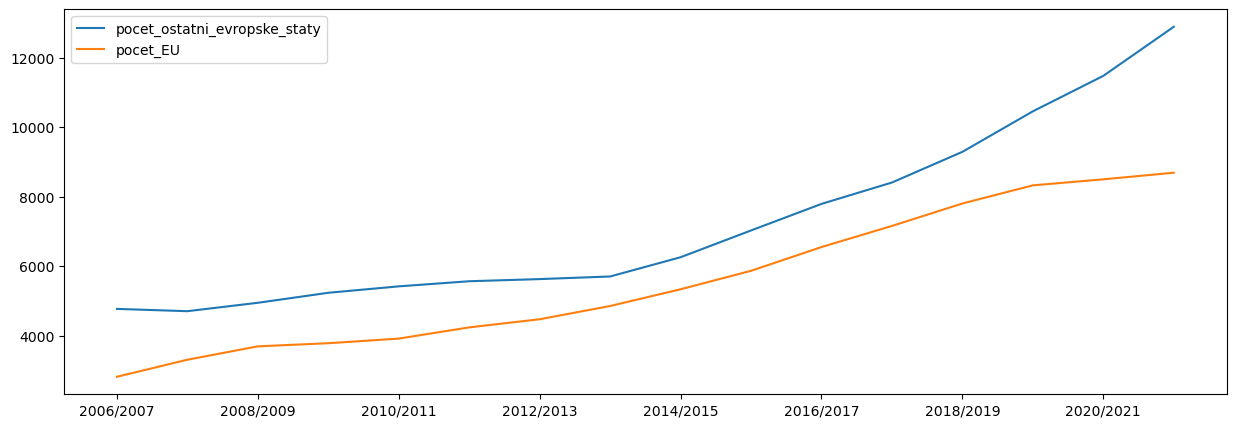

In [19]:
data.plot(figsize=(15,5))

## Cviceni

Napište program, který bude pracovat se stránkou o DHMO na adrese https://apps.kodim.cz/python-data/dhmo.

Nechť program vypíše na výstup nadpisy všech sekcí (značka h2).
Nechť program vypíše na výstup cesty všech odkazů na stránce (značka a, atribut href).
Nechť program vypíše na výstup cesty ke všem obrázkům na stránce (značka img, atribut src).

In [20]:
from requests_html import HTMLSession, HTML

In [21]:
def print_elem_attributes(input_page: HTML, element: str, attribute: str) -> None:
    elements = input_page.find(element)
    print(f"All attributes {attribute} for each {element}.")
    for elem in elements:
        print(elem.attrs[attribute])

In [22]:
session = HTMLSession()
stranka = session.get('https://apps.kodim.cz/python-data/dhmo')

In [23]:
page_html = stranka.html

In [24]:
headlines = page_html.find("h2")

for headline in headlines:
    print(headline.text)

Strašák DHMO
Další fakta
Petice proti DHMO
Odkazy


In [25]:
print_elem_attributes(page_html, "a", "href")


All attributes href for each a.
http://www.dhmo.org/
http://www.matthew.at/dhm.pdf
http://www.snopes.com/science/dhmo.asp


In [26]:
print_elem_attributes(page_html, "img", "src")

All attributes src for each img.
img/dhmo.jpg
img/dhmo-ban.png


Jistě vás nepřekvapí, že stránky, které právě čtete, se dají také snadno scrapovat.

Napište program, který vypíše na výstup všechna cvičení z lekce Vstup a výstup spolu s jejich obtížností.

In [27]:
kodim_page = session.get("https://kodim.cz/kurzy/uvod-do-progr-1/prvni-krucky/vstup-vystup/excs")
kodim_page_html = kodim_page.html

In [28]:
kodim_page_html

<HTML url='https://kodim.cz/kurzy/uvod-do-progr-1/prvni-krucky/vstup-vystup/excs'>

In [29]:
classes = kodim_page_html.find(".exercise-assign__title-anchor")

for c in classes:
    print(c.text)

Jednoduchý výstup
Jednoduchý vstup
Zakázka pro divadlo
Házení kostkami
Generátor čísel


In [30]:
difficulty = kodim_page_html.find(".demand__text")

for d in difficulty:
    print(d.text)

to dáš
to dáš
to dáš
zavařovačka
to dáš
